## Competition Task - Group 11

Topic : Sports

Data Source: https://www.kaggle.com/kukuroo3/body-performance-data from Korea Sports Promotion Foundation. This data shows physical performance with respect to age, gender, health condition, exercise and body index data. Column 'class' shows performance rating from A to D, with A being 'best' and D the'worst'. 

This data will be used to build a ML model to predict performance of any person.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## 1. Loading Data

In [2]:
data = pd.read_csv('bodyPerformance.csv')

In [3]:
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [4]:
data_copy = data.copy()

In [5]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [6]:
# checking for null values
data.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

The data is clean and doesnt have any null values.

In [7]:
# getting column names
column_name = data.columns
print(column_name)

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')


In [8]:
# checking object datatypes
print('The unique values in gender are',data['gender'].unique(),'\n')

print('The unique values in class are',data['class'].unique())

The unique values in gender are ['M' 'F'] 

The unique values in class are ['C' 'A' 'B' 'D']


## 2. Pre-processing of the data

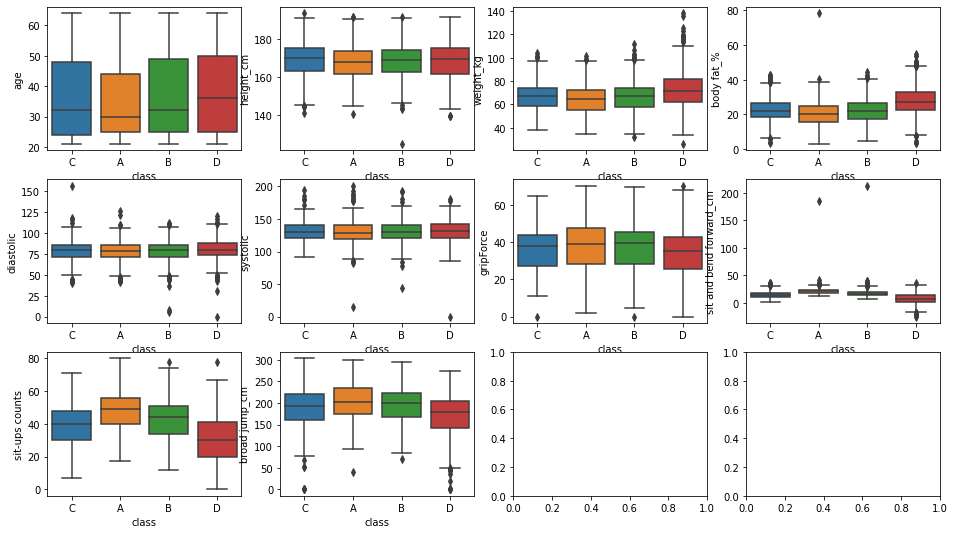

In [9]:
# Checking the data distribution with box plots

fig, axes = plt.subplots(int(len(data.columns)/4),int(len(data.columns)/3), figsize=(16,9))
count1 = 0
count2 = 0
for i in (data.columns): 
    if data[i].dtype != object and (count2<int(len(data.columns)/3)):
        sns.boxplot(y=data[i],x=data['class'],orient='v',data=data, ax=axes[count1, count2])
        count2 = count2+1
    elif data[i].dtype != object:       
        count1 = count1+1
        count2=0
        sns.boxplot(y=data[i],x=data['class'],orient='v',data=data, ax=axes[count1, count2])
        count2 = count2+1

    

There are some outliers in the data these will handled in the coming steps.

In [10]:
# outlier detection and handling

#count = -1
for i in data.columns:
    #count = count+1
    if data[i].dtype != object:
        for j in data["class"].unique():
            classtype = data[data["class"] == j]
            column = classtype[i]
            q1 = column.quantile(0.25) 
            q3 = column.quantile(0.75) 
            iqr = q3 - q1 
            upper_limit = q3 + 1.5 * iqr
            lower_limit = q1 - 1.5 * iqr        
            outliers = column[(column > upper_limit) | (column < lower_limit)].index 
            data.drop(index = outliers, inplace=True)
            #print('For column',column_name[count], 'the outliers are', outliers)

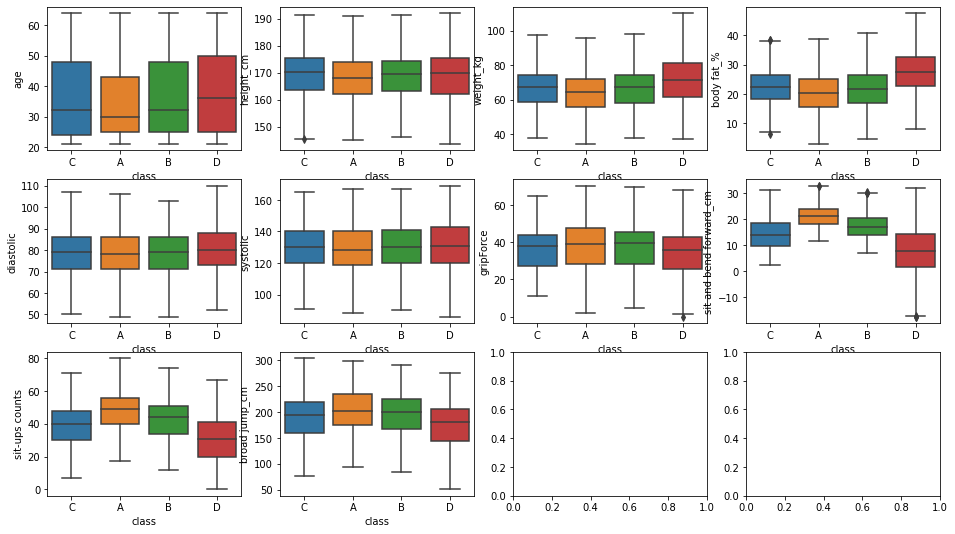

In [11]:
# Checking the data distribution with box plots after handling

fig, axes = plt.subplots(int(len(data.columns)/4),int(len(data.columns)/3), figsize=(16,9))
count1 = 0
count2 = 0
for i in (data.columns): 
    if data[i].dtype != object and (count2<int(len(data.columns)/3)):
        sns.boxplot(y=data[i],x=data['class'],orient='v',data=data, ax=axes[count1, count2])
        count2 = count2+1
    elif data[i].dtype != object:       
        count1 = count1+1
        count2=0
        sns.boxplot(y=data[i],x=data['class'],orient='v',data=data, ax=axes[count1, count2])
        count2 = count2+1



Here you can see that most of the outliers have been handled. The data in this form will be used for model creation.

In [12]:
# Feature encoding 

from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
data['class']=label_en.fit_transform(data['class'])


# one-hot encoding
gender_en=pd.get_dummies(data['gender'])

data = pd.concat([data,gender_en],axis=1)
data = data.drop('gender',axis=1)

data

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,F,M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2,0,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0,0,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2,0,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1,0,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,2,0,1
13389,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,3,0,1
13390,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,0,0,1
13391,64.0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,3,1,0


 
 after encoding the class A-D became 0-3, with A being 0 and D being 3.
 

In [13]:
# Splitting data after encoding for training

x = data.drop(['class'], axis=1)
y = data['class']

In [14]:
x.columns

Index(['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic',
       'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'F', 'M'],
      dtype='object')

In [15]:
# Feature engineering of exercise counts

x['mean'] = x[['gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm']].mean(axis=1)

x['sum'] = x[['gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm']].sum(axis=1)

x['kurt'] = x[['gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm']].kurt(axis=1)

x['skew'] = x[['gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm']].skew(axis=1)



In [16]:
x.columns

Index(['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic',
       'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'F', 'M', 'mean', 'sum', 'kurt', 'skew'],
      dtype='object')

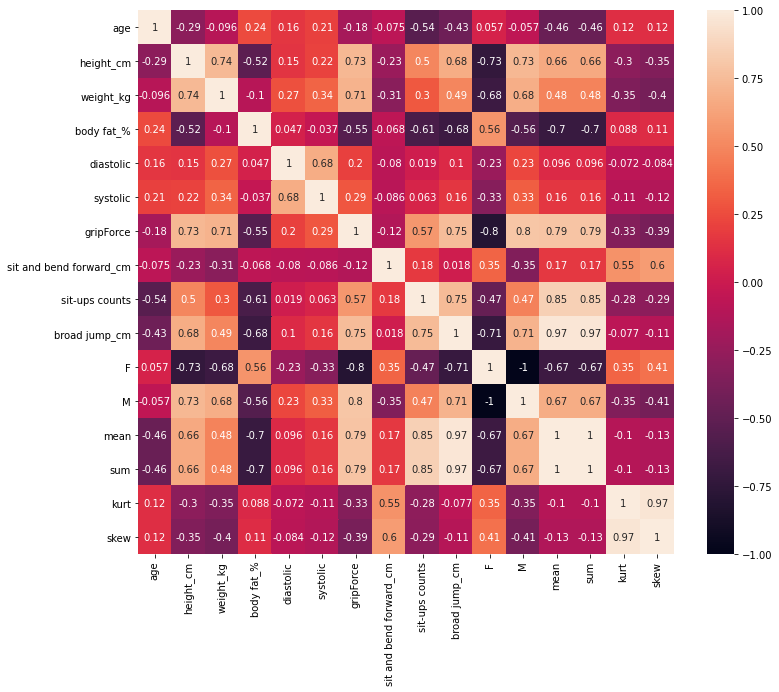

In [17]:
# Feature reduction
correlation=x.corr()

#ploting the heatmap for correlation
plt.figure(figsize=(12,10))
ax = sns.heatmap(x.corr(), annot=True)

For feature reduction only the features with positive correlation above 0.8 is considered. The high negetive correlation shown here is due to gender encoding, these columns cannot be reduced and will be taken for modelling 

The newly added columns mean and sum has high correlation. Therefore mean is dropped from this list. Kurt and skew also show high correlation. Skew is dropped as well.

In [18]:
x= x.drop(['mean','skew'],axis=1)
x.columns

Index(['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic',
       'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'F', 'M', 'sum', 'kurt'],
      dtype='object')

In [19]:
# Feature scaling or standardization/normalization

x.describe()


,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,F,M,sum,kurt
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,36.719033,168.611853,67.392716,23.141491,78.846231,130.244302,37.031101,15.190489,39.925863,190.691143,0.364586,0.635414,282.838596,3.531984
std,13.587980,8.322361,11.695341,7.110860,10.457279,14.384755,10.553468,7.956990,14.181254,39.117295,0.481332,0.481332,59.674138,0.321140
min,21.000000,143.600000,34.500000,3.000000,49.000000,86.000000,0.000000,-17.400000,0.000000,51.000000,0.000000,0.000000,68.600000,-1.617329
25%,25.000000,162.500000,58.200000,18.000000,71.000000,120.000000,27.600000,10.900000,31.000000,163.000000,0.000000,0.000000,242.500000,3.378437
50%,32.000000,169.300000,67.500000,22.700000,79.000000,130.000000,38.000000,16.200000,42.000000,194.000000,0.000000,1.000000,286.800000,3.570069
75%,48.000000,174.700000,75.300000,27.900000,86.000000,141.000000,45.200000,20.700000,51.000000,222.000000,1.000000,1.000000,329.800000,3.747299
max,64.000000,192.000000,110.100000,47.500000,110.000000,169.000000,70.500000,32.900000,80.000000,303.000000,1.000000,1.000000,437.100000,3.999983


In [20]:
# Rescaling the values
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

min_max_scaler.fit(x)
x_scaled = min_max_scaler.transform(x)
x = pd.DataFrame(x_scaled, columns=x.columns)

In [21]:
# After rescaling
x

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,F,M,sum,kurt
0,0.139535,0.592975,0.538889,0.411236,0.508197,0.530120,0.778723,0.711730,0.7500,0.658730,0.0,1.0,0.764450,0.870636
1,0.093023,0.442149,0.281746,0.285393,0.459016,0.481928,0.516312,0.669980,0.6625,0.706349,0.0,1.0,0.722117,0.919771
2,0.232558,0.743802,0.575397,0.384270,0.704918,0.795181,0.635461,0.584493,0.6125,0.515873,0.0,1.0,0.592130,0.858355
3,0.255814,0.638430,0.484127,0.346067,0.442623,0.734940,0.587234,0.648111,0.6625,0.666667,0.0,1.0,0.705563,0.906393
4,0.162791,0.623967,0.439153,0.316854,0.344262,0.493976,0.617021,0.884692,0.5625,0.658730,0.0,1.0,0.716418,0.972869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114,0.093023,0.588843,0.493386,0.296629,0.409836,0.662651,0.507801,0.691849,0.5875,0.583333,0.0,1.0,0.623066,0.928048
13115,0.000000,0.745868,0.388889,0.204494,0.409836,0.506024,0.468085,0.367793,0.6000,0.460317,0.0,1.0,0.489824,0.784914
13116,0.418605,0.694215,0.608466,0.384270,0.475410,0.554217,0.900709,0.671968,0.5625,0.706349,0.0,1.0,0.774220,0.866598
13117,1.000000,0.051653,0.306878,0.840449,0.311475,0.421687,0.273759,0.528827,0.0000,0.095238,1.0,0.0,0.094708,0.811872


## 3. Exploratory Data analysis

In [22]:
data_copy.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


<AxesSubplot:xlabel='gender', ylabel='gripForce'>

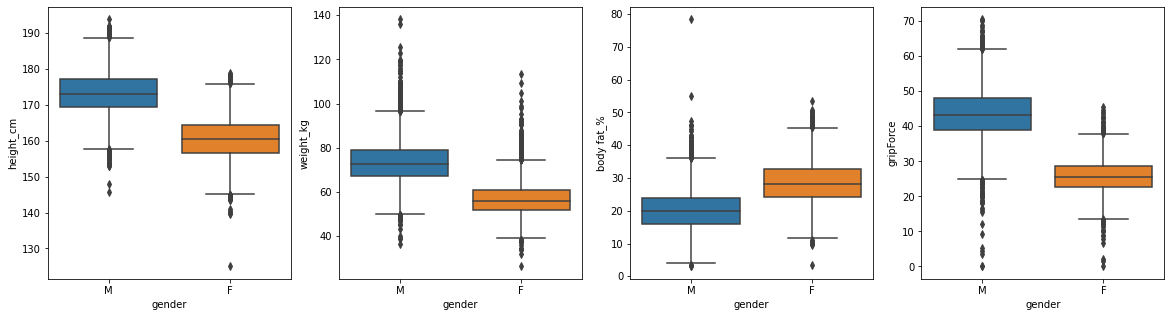

In [23]:
#Gender Vs height / weight / Bodyfat / Gripforce
plt.figure(figsize=(20,5))
ax = plt.subplot(1,4,1)
sns.boxplot(x="gender", y="height_cm", data=data_copy, ax=ax)
ax = plt.subplot(1,4,2)
sns.boxplot(x="gender", y="weight_kg", data=data_copy, ax=ax)
ax = plt.subplot(1,4,3)
sns.boxplot(x="gender", y="body fat_%", data=data_copy, ax=ax)
ax = plt.subplot(1,4,4)
sns.boxplot(x="gender", y="gripForce", data=data_copy, ax=ax)

In [24]:
#Observations:
# - Male participants are heavier and taller than female participants
# - Body Fat percentage is higher in female participants, whereas the gripforce is greater for male participants 

<AxesSubplot:xlabel='age', ylabel='sit-ups counts'>

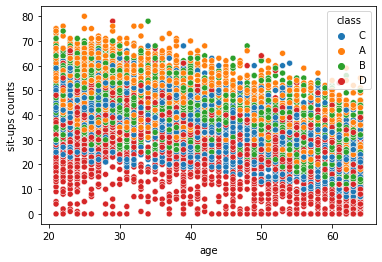

In [25]:
# Age Vs sit ups
sns.scatterplot(data=data_copy, x="age", y="sit-ups counts",hue='class')

<AxesSubplot:xlabel='age', ylabel='sit and bend forward_cm'>

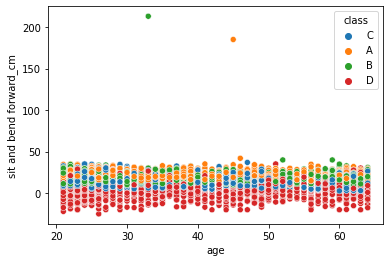

In [26]:
# Age Vs sit and bend forward
sns.scatterplot(data=data_copy, x="age", y="sit and bend forward_cm",hue='class')

<AxesSubplot:xlabel='age', ylabel='broad jump_cm'>

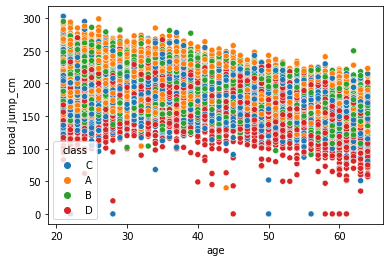

In [27]:
# Age Vs Broad Jump
sns.scatterplot(data=data_copy, x="age", y="broad jump_cm",hue='class')

In [28]:
#Observations
# - Younger people tend to do more sit ups and broad jumps. 
# - Whereas, sit and jump forward is done by everyone irrespective of their age

<AxesSubplot:xlabel='age', ylabel='body fat_%'>

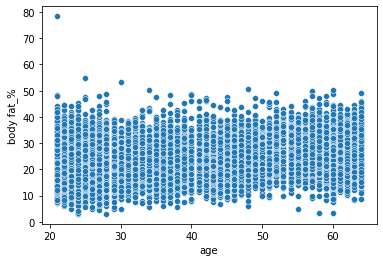

In [29]:
#Age Vs Bodyfat / Gripforce
sns.scatterplot(data=data_copy, x="age", y="body fat_%")

<AxesSubplot:xlabel='age', ylabel='gripForce'>

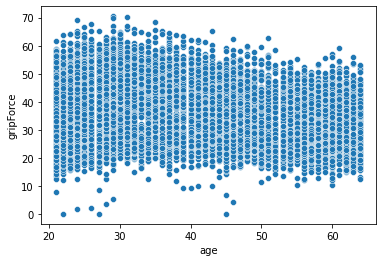

In [30]:
sns.scatterplot(data=data_copy, x="age", y="gripForce")

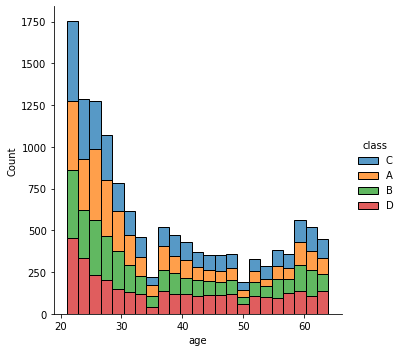

In [31]:
# Age of participants 
sns.displot(data_copy, x='age', hue='class', multiple="stack") 

In [32]:
#Observations
# - There are more people in their 20's than other age groups in the dataset 

In [33]:
total_males, total_females = data_copy['gender'].value_counts()
print('Women precentage:{:.1f}%'.format(total_females/len(data_copy)*100))
print('Men precentage:{:.1f}%'.format(total_males/len(data_copy)*100))

Women precentage:36.8%
Men precentage:63.2%


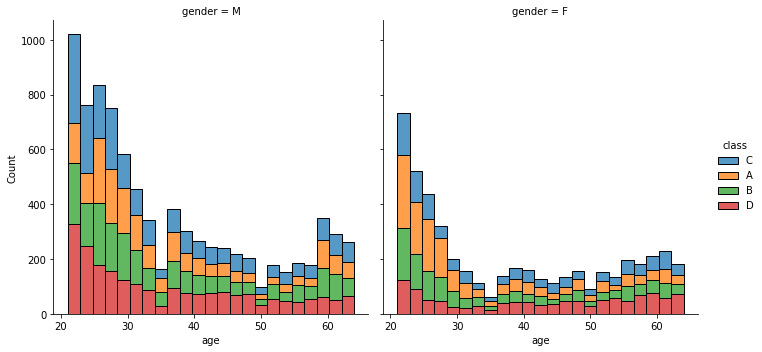

In [34]:
# Gender Vs Age
sns.displot(data=data_copy, x="age", hue="class", col="gender", multiple="stack")

In [35]:
#Observations
# - 63 % of the dataset contain male participants.
# As the size variation clearly effect the observation, the box sizes can be ignored and proportions can be used.

# females at their early 20's tend to perform better than males in the same age category
# Whereas, when comparing participants in the age range above 60, men tend to show better performance.
# In the range 30 - 60 they tend to behave pretty much the same.

## 4. Modelling

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [37]:
x_train.shape

(9183, 14)

In [38]:
x_test.shape

(3936, 14)

In [39]:
y_test.shape

(3936,)

In [40]:
y_train.shape

(9183,)

### Logistic Regression

In [41]:


from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression(solver='saga',max_iter=2000)
logistic_model.fit(x_train,y_train)
y_pred=logistic_model.predict(x_test)

In [42]:
# checking the accuracy values
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'weighted'))
print("Recall is: ", recall_score(y_test,y_pred, average = 'weighted'))
print("F1 score is: ", f1_score(y_test,y_pred, average = 'weighted'))

Accuracy is:  0.625
Precision is:  0.6227156017231456
Recall is:  0.625
F1 score is:  0.6234678599350236


### KNN

In [43]:
# Building KNN model
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,20)

for k in neighbors:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train,y_train)
    y_pred = knn_classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'Accuracy')

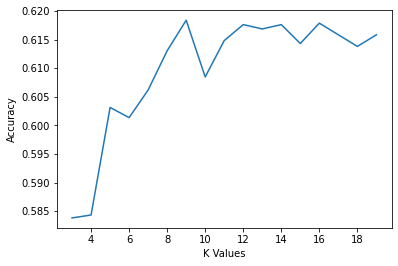

In [44]:
plt.plot(neighbors, acc_values)
plt.xlabel('K Values')
plt.ylabel('Accuracy')

we get max accuracy with k=9

In [45]:
knn_classifier = KNeighborsClassifier(n_neighbors=11)
knn_classifier.fit(x_train,y_train)
y_pred = knn_classifier.predict(x_test)

In [46]:
print("ACCURACY: ",accuracy_score(y_test,y_pred))
print("PRECISION: ",precision_score(y_test,y_pred,average='micro'))
print("RECALL: ",recall_score(y_test,y_pred,average='micro'))
print("F1_score",f1_score(y_test,y_pred,average='micro'))

ACCURACY:  0.6148373983739838
PRECISION:  0.6148373983739838
RECALL:  0.6148373983739838
F1_score 0.6148373983739838


### SVM

In [47]:
from sklearn.svm import SVC
acc_values = []
for item in ['linear','poly','rbf']:
    svm_classifier = SVC(kernel=item)
    svm_classifier.fit(x_train,y_train)
    y_pred = svm_classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [48]:
acc_values

[0.6333841463414634, 0.7098577235772358, 0.666920731707317]

In [49]:
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(x_train,y_train)
y_pred = svm_classifier.predict(x_test)

In [50]:
print("ACCURACY: ",accuracy_score(y_test,y_pred))
print("PRECISION: ",precision_score(y_test,y_pred,average='micro'))
print("RECALL: ",recall_score(y_test,y_pred,average='micro'))
print("F1_score",f1_score(y_test,y_pred,average='micro'))

ACCURACY:  0.666920731707317
PRECISION:  0.666920731707317
RECALL:  0.666920731707317
F1_score 0.666920731707317


### DECISION TREE

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train,y_train)
y_pred = dt_classifier.predict(x_test)

In [52]:
print("ACCURACY: ",accuracy_score(y_test,y_pred))
print("PRECISION: ",precision_score(y_test,y_pred,average='micro'))
print("RECALL: ",recall_score(y_test,y_pred,average='micro'))
print("F1_score",f1_score(y_test,y_pred,average='micro'))

ACCURACY:  0.6407520325203252
PRECISION:  0.6407520325203252
RECALL:  0.6407520325203252
F1_score 0.6407520325203252


### RANDOM FOREST

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train,y_train)
y_pred = rf_classifier.predict(x_test)

In [54]:
print("ACCURACY: ",accuracy_score(y_test,y_pred))
print("PRECISION: ",precision_score(y_test,y_pred,average='micro'))
print("RECALL: ",recall_score(y_test,y_pred,average='micro'))
print("F1_score",f1_score(y_test,y_pred,average='micro'))

ACCURACY:  0.7263719512195121
PRECISION:  0.7263719512195121
RECALL:  0.7263719512195121
F1_score 0.726371951219512


## 5. Model Fine Tuning

### Tuning Logistic Regression model

In [59]:
from sklearn.model_selection import GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
model_parameters = {'penalty':penalty,'solver':solvers,'C':c_values}

In [66]:
model = LogisticRegression()
logReg_search = GridSearchCV(estimator=model, param_grid=model_parameters, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
logReg_search.fit(x_train,y_train)
y_pred = logReg_search.predict(x_test)

In [67]:
logReg_search.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [68]:
logreg = LogisticRegression(**logReg_search.best_params_)
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

In [69]:
print("ACCURACY: ",accuracy_score(y_test,y_pred))
print("PRECISION: ",precision_score(y_test,y_pred,average='micro'))
print("RECALL: ",recall_score(y_test,y_pred,average='micro'))
print("F1_score",f1_score(y_test,y_pred,average='micro'))

ACCURACY:  0.6364329268292683
PRECISION:  0.6364329268292683
RECALL:  0.6364329268292683
F1_score 0.6364329268292683



The predictions have improved slightly compared to previous Logistic Regression prediction. The accuracy improvement is as follows:

---- before tuning ------

Accuracy is:  0.625

Precision is:  0.6227156017231456

Recall is:  0.625

F1 score is:  0.6234678599350236

----- after tuning --------

ACCURACY:  0.6364329268292683

PRECISION:  0.6364329268292683

RECALL:  0.6364329268292683

F1_score 0.6364329268292683

### Tuning of Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

#making the instance
model= DecisionTreeClassifier(random_state=1234)

#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)

model1.fit(x_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)
#Prediction
y_pred=model1.predict(x_test)

Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 14, 'random_state': 123}


In [75]:
print("ACCURACY: ",accuracy_score(y_test,y_pred))
print("PRECISION: ",precision_score(y_test,y_pred,average='micro'))
print("RECALL: ",recall_score(y_test,y_pred,average='micro'))
print("F1_score",f1_score(y_test,y_pred,average='micro'))

ACCURACY:  0.6173780487804879
PRECISION:  0.6173780487804879
RECALL:  0.6173780487804879
F1_score 0.6173780487804879


The accuracy changes are shown below after tuning

----- before tuning --------

ACCURACY:  0.6407520325203252

PRECISION:  0.6407520325203252 

RECALL:  0.6407520325203252 

F1_score 0.6407520325203252 

----- after tuning --------

ACCURACY:  0.6173780487804879

PRECISION:  0.6173780487804879

RECALL:  0.6173780487804879

F1_score 0.6173780487804879

### Tuning Random Forest Model

In [55]:

model_parameters = {'n_estimators': [50, 100, 200, 400, 500, 700, 900],
               'criterion': ['gini', 'entropy'],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

In [56]:
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestClassifier()

rf_search = RandomizedSearchCV(estimator = model, 
                               param_distributions = model_parameters, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

rf_search.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 400, 500,
                                                         700, 900]},
                   random_state=42, verbose=2)

In [57]:
y_pred = rf_search.predict(x_test)

In [58]:
print("ACCURACY: ",accuracy_score(y_test,y_pred))
print("PRECISION: ",precision_score(y_test,y_pred,average='micro'))
print("RECALL: ",recall_score(y_test,y_pred,average='micro'))
print("F1_score",f1_score(y_test,y_pred,average='micro'))

ACCURACY:  0.7383130081300813
PRECISION:  0.7383130081300813
RECALL:  0.7383130081300813
F1_score 0.7383130081300813



The predictions have improved slightly compared to previous Rain Forest predictions. Here is the comparison

---- before tuning ------

ACCURACY:  0.7263719512195121

PRECISION:  0.7263719512195121

RECALL:  0.7263719512195121

F1_score 0.7263719512195121

----- after tuning --------

ACCURACY:  0.7383130081300813

PRECISION:  0.7383130081300813

RECALL:  0.7383130081300813

F1_score 0.7383130081300813

#### Model Evaluvation:  

The sports data has been used to build a model for predicting performance class of people. The best performing model was Rain Forest method and least accuracy was for Logistic Regresssion method. 

The tuning of hyperparameters has resulted in changes. Both the Logistic Regression and Rain Forest method was tuned and improvements have been made in the accuracy. The best performing model has accuracy of 0.735 and which is a good result. 


## Submitted by Group 11 